In [1]:
"""Name: Sauda Salehe
AndrewId:  ssalehe
Programming Practice Task
"""

'Name: Sauda Salehe\nAndrewId:  ssalehe\nProgramming Practice Task\n'

## Excercise 1


In [2]:
#pip install requests beautifulsoup4

In [3]:
# import requests
# from bs4 import BeautifulSoup
# import re

# url = "https://en.wikipedia.org"
# page = requests.get(url)
# print(page.text)

In [8]:
import requests
from bs4 import BeautifulSoup
import re

class WebScraper:
    def __init__(self, url):
        self.url = url

    def download_html(self, file_name='webpage.html'):
        #downloading the HTML content
        response = requests.get(self.url)
        if response.status_code == 200:
            #save to the file
            with open(file_name, 'w', encoding='utf-8') as file:
                file.write(response.text)
        else:
            print("Failed to retrieve the webpage. Status code:", response.status_code)

    def extract_content(self):
        #opening the HTML file and parse it
        with open('webpage.html', 'r', encoding='utf-8') as file:
            soup = BeautifulSoup(file, 'html.parser')
            
            #extracting the title
            self.title = soup.title.string if soup.title else "No title found"
            
            #extracting all paragraphs
            self.paragraphs = [p.get_text() for p in soup.find_all('p')]
            
            
#     def extract_content(self, file_name='downloaded_file.html'):
#         # Open the HTML file and parse it
#         with open(file_name, 'r', encoding='utf-8') as file:
#             soup = BeautifulSoup(file, 'html.parser')

#             # Extract the title
#             self.title = soup.title.string if soup.title else "No title found"

#             # Find the main content section and extract paragraphs from it
#             content_div = soup.find('div', {'class': 'mw-parser-output'})
#             if content_div:
#                 self.paragraphs = [p.get_text() for p in content_div.find_all('p')]
#             else:
#                 self.paragraphs = ["Main content not found"]

#             print(f"Title: {self.title}")
#             print("Extracted Paragraphs:", self.paragraphs)


    def save_text(self, file_name='extracted_content.txt'):
        #save title and paragraphs to a text file
        with open(file_name, 'w', encoding='utf-8') as file:
            file.write(f"Title: {self.title}\n\n")
            file.write("Paragraphs:\n")
            for paragraph in self.paragraphs:
                file.write(paragraph + "\n")



class TextProcessor:
    @staticmethod
    def clean_text(paragraphs):
        cleaned_paragraphs = []
        for paragraph in paragraphs:
            # Remove special characters and extra whitespace
            cleaned_paragraph = re.sub(r'\s+', ' ', paragraph)
            cleaned_paragraph = re.sub(r'[^\w\s]', '', cleaned_paragraph)
            # Convert to lowercase
            cleaned_paragraph = cleaned_paragraph.lower()
            cleaned_paragraphs.append(cleaned_paragraph)
        return cleaned_paragraphs



### Exercise 2 

In [5]:
#pip install TextBlob

In [9]:
from textblob import TextBlob
import matplotlib.pyplot as plt

class SentimentAnalyzer:
    def __init__(self):
        self.sentiment_counts = {"positive": 0, "negative": 0, "neutral": 0}
        self.total_paragraphs = 0
        self.total_polarity = 0
        self.total_subjectivity = 0

    def analyze_sentiment(self, file_name='extracted_content.txt'):
        # Read the cleaned text file
        with open(file_name, 'r', encoding='utf-8') as file:
            paragraphs = file.readlines()

        #analyze the sentiment for each paragraph
        self.paragraphs_sentiment = []
        for paragraph in paragraphs:
            blob = TextBlob(paragraph)
            polarity = blob.sentiment.polarity
            subjectivity = blob.sentiment.subjectivity
            self.paragraphs_sentiment.append((paragraph, polarity, subjectivity))
            print(f"Paragraph: {paragraph.strip()}")
            print(f"Sentiment Polarity: {polarity}, Subjectivity: {subjectivity}\n")

    def count_sentiments(self, paragraphs):
        #count the positive, negative, and neutral paragraphs based on polarity
        for paragraph, polarity, _ in self.paragraphs_sentiment:
            if polarity > 0:
                self.sentiment_counts["positive"] += 1
            elif polarity < 0:
                self.sentiment_counts["negative"] += 1
            else:
                self.sentiment_counts["neutral"] += 1

        print("Sentiment Counts:", self.sentiment_counts)
        

    def summarize_sentiment(self, file_name='sentiment_summary.txt'):
        self.total_paragraphs = len(self.paragraphs_sentiment)
        self.total_polarity = sum(polarity for _, polarity, _ in self.paragraphs_sentiment)
        self.total_subjectivity = sum(subjectivity for _, _, subjectivity in self.paragraphs_sentiment)

        avg_polarity = self.total_polarity / self.total_paragraphs if self.total_paragraphs else 0
        avg_subjectivity = self.total_subjectivity / self.total_paragraphs if self.total_paragraphs else 0

        #writing a summary to the file
        with open(file_name, 'w', encoding='utf-8') as file:
            file.write(f"Total paragraphs analyzed: {self.total_paragraphs}\n")
            file.write(f"Positive paragraphs: {self.sentiment_counts['positive']}\n")
            file.write(f"Negative paragraphs: {self.sentiment_counts['negative']}\n")
            file.write(f"Neutral paragraphs: {self.sentiment_counts['neutral']}\n")
            file.write(f"Average sentiment polarity: {avg_polarity:.2f}\n")
            file.write(f"Average sentiment subjectivity: {avg_subjectivity:.2f}\n")

        print("Sentiment Summary saved to sentiment_summary.txt")


class Visualizer:
    @staticmethod
    def plot_sentiment(counts):
        # Visualize sentiment counts using a bar graph
        labels = counts.keys()
        values = counts.values()

        plt.figure(figsize=(8, 6))
        plt.bar(labels, values, color=['green', 'red', 'blue'])
        plt.xlabel('Sentiment')
        plt.ylabel('Number of Paragraphs')
        plt.title('Sentiment Analysis Results')
        plt.show()





Cleaned Paragraphs: ['an important update for readers in the united states', ' please dont skip this 1minute read were sorry to interrupt but this message will only be up for a short time we ask you to reflect on the number of times you visited wikipedia this past year and whether youre able to give 275 to the wikimedia foundation if you can please join the 2 of readers who give if everyone reading this gave just 275 wed hit our goal in a few hours ', ' in the age of ai access to verifiable facts is crucial wikipedia is at the heart of online information powering everything from your personal searches to emerging ai technologies your gift strengthens the knowledge of today and tomorrow ', ' if wikipedia is one of the websites you use most and if the knowledge you gained here is valuable please give 275 every contribution helps every edit every gift counts ', 'hi please dont skip this 1minute read today our nonprofit asks for your support it matters when wikipedia was created it was one

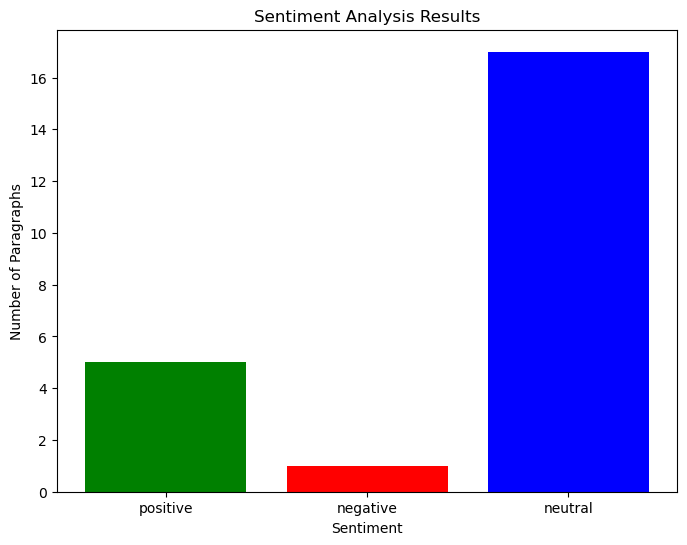

In [10]:
url = 'https://www.wikipedia.org'
scraper = WebScraper(url)
scraper.download_html()
scraper.extract_content()
scraper.save_text()

#creating an object for TextProcessor and clean_text function
processor = TextProcessor()
cleaned_paragraphs = processor.clean_text(scraper.paragraphs)
print("Cleaned Paragraphs:", cleaned_paragraphs)


#creating an object for SentimentAnalyzer and call the fuctions
analyzer = SentimentAnalyzer()
analyzer.analyze_sentiment()  
analyzer.count_sentiments(analyzer.paragraphs_sentiment) 
analyzer.summarize_sentiment()  

#creating an object for Visualizer and call plot_sentiment fuction
visualizer = Visualizer()
visualizer.plot_sentiment(analyzer.sentiment_counts)

## Exercise 3

In [11]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from collections import Counter
import re


#extending WebScraper class
class WebScraper:
    def __init__(self):
        self.urls = []

    def scrape_multiple_pages(self, urls):
        # Loop through each URL, scrape content, and save each to a separate file
        for i, url in enumerate(urls, start=1):
            response = requests.get(url)
            if response.status_code == 200:
                soup = BeautifulSoup(response.text, 'html.parser')
                
                #extract content (title and paragraphs)
                title = soup.title.string if soup.title else "No title"
                paragraphs = [p.get_text() for p in soup.find_all('p')]
                content = f"Title: {title}\n\n" + "\n".join(paragraphs)

                #save to a text file
                file_name = f'article{i}.txt'
                with open(file_name, 'w', encoding='utf-8') as file:
                    file.write(content)
            else:
                print(f"Failed to retrieve {url}. Status code:", response.status_code)


class TextProcessor:
    @staticmethod
    def aggregate_texts(file_names):
        aggregated_content = ""
        for file_name in file_names:
            with open(file_name, 'r', encoding='utf-8') as file:
                aggregated_content += file.read() + "\n\n"
        
        # Save aggregated content
        with open('aggregated_content.txt', 'w', encoding='utf-8') as file:
            file.write(aggregated_content)
        
        return aggregated_content

    @staticmethod
    def find_frequent_words():
        with open('aggregated_content.txt', 'r', encoding='utf-8') as file:
            content = file.read()
        
        #removing special characters and split words
        words = re.findall(r'\b\w+\b', content.lower())
        
        #defining common English stopwords
        stopwords = set(["the", "and", "is", "in", "to", "of", "a", "that", "it", "for", "with", "as", "on", "this", "by", "an"])
        filtered_words = [word for word in words if word not in stopwords]
        
        #counting word frequencies
        word_counts = Counter(filtered_words)
        most_common_words = word_counts.most_common(10)
        
        print("Top 10 most frequent words (excluding stopwords):")
        for word, count in most_common_words:
            print(f"\n{word}: {count}")


class SentimentAnalyzer:
    def analyze_sentiment(self, file_name='aggregated_content.txt'):
        # Read the aggregated content
        with open(file_name, 'r', encoding='utf-8') as file:
            content = file.read()
        
        #perform sentiment analysis
        blob = TextBlob(content)
        overall_polarity = blob.sentiment.polarity
        overall_subjectivity = blob.sentiment.subjectivity

        print(f"Overall Sentiment Polarity: {overall_polarity}")
        print(f"Overall Sentiment Subjectivity: {overall_subjectivity}")


        
        
urls = [
    'https://www.wikipedia.org',
    'http://books.toscrape.com',
]

# Step 1: Scrape multiple pages
scraper = WebScraper()
scraper.scrape_multiple_pages(urls)

# Step 2: Aggregate content from files
file_names = [f'article{i}.txt' for i in range(1, len(urls) + 1)]
processor = TextProcessor()
aggregated_content = processor.aggregate_texts(file_names)

# Step 3: Perform sentiment analysis on the aggregated content
analyzer = SentimentAnalyzer()
analyzer.analyze_sentiment()

# Step 4: Find the most frequent words
processor.find_frequent_words()


Overall Sentiment Polarity: 0.16666666666666666
Overall Sentiment Subjectivity: 0.6405555555555555
Top 10 most frequent words (excluding stopwords):

â: 21

stock: 20

you: 8

wikipedia: 7

your: 6

2: 5

please: 4

if: 4

readers: 3

read: 3


## Excerise 4

In [ ]:
#pip install selenium

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import requests
import re

class WebScraper:
    def __init__(self, url=None):
        self.url = url

    def scrape_dynamic_content(self, search_url, search_term):
        # Initialize Selenium WebDriver
        driver = webdriver.Chrome() 
        driver.get(search_url)
        
        #finding search input and enter the search term
        search_box = driver.find_element(By.ID, 'searchInput')  # Wikipedia search box uses ID 'searchInput'
        search_box.send_keys(search_term)
        search_box.send_keys(Keys.RETURN)  # Press Enter to submit the search
        
        #waiting for content to load, then scrape
        driver.implicitly_wait(10)  
        page_source = driver.page_source
        
        # Parse page source with BeautifulSoup
        soup = BeautifulSoup(page_source, 'html.parser')
        
        #extracting and save dynamic content
        dynamic_content = soup.get_text()
        with open('dynamic_content.txt', 'w', encoding='utf-8') as file:
            file.write(dynamic_content)
        
        driver.quit()
        print("Dynamic content scraped and saved to dynamic_content.txt")

    def extract_metadata(self, file_name='metadata.txt'):
        # Fetch and parse the webpage
        response = requests.get(self.url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            
            #extracting the metadata
            description = soup.find('meta', attrs={'name': 'description'})
            keywords = soup.find('meta', attrs={'name': 'keywords'})
            
            description_content = description['content'] if description else "No meta description found"
            keywords_content = keywords['content'] if keywords else "No keywords found"
            
            #Saving the metadata to file
            with open(file_name, 'w', encoding='utf-8') as file:
                file.write(f"Meta Description: {description_content}\n")
                file.write(f"Keywords: {keywords_content}\n")
            
            print(f"Metadata extracted and saved to {file_name}")
        else:
            print("Failed to retrieve webpage for metadata extraction.")

    def keyword_search(self, keyword, urls):
        keyword_counts = {}
        
        #iterating over URLs and count keyword occurrences
        for url in urls:
            response = requests.get(url)
            if response.status_code == 200:
                text = BeautifulSoup(response.text, 'html.parser').get_text()
                keyword_count = len(re.findall(rf'\b{keyword}\b', text, re.IGNORECASE))
                keyword_counts[url] = keyword_count

                print(f"Keyword '{keyword}' found {keyword_count} times in {url}")
            else:
                print(f"Failed to retrieve {url}. Status code:", response.status_code)
        
        # Save results to file
        with open('keyword_counts.txt', 'w', encoding='utf-8') as file:
            for url, count in keyword_counts.items():
                file.write(f"{url}: {keyword} appears {count} times\n")
        
        return keyword_counts



scraper = WebScraper(url="https://www.wikipedia.org")

# Step 1: Scrape dynamic content
scraper.scrape_dynamic_content("https://www.wikipedia.org", "example")

# Step 2: Extract metadata
scraper.extract_metadata()

# Step 3: Keyword search across multiple URLs
urls = [
     'https://www.wikipedia.org',
    'http://books.toscrape.com',
]
keyword_counts = scraper.keyword_search("search", urls)
print("Keyword search results saved to keyword_counts.txt")


Extracted 1 articles from https://www.bbc.com/news.
Extracted 0 articles from https://edition.cnn.com/.
Extracted 0 articles from https://www.theguardian.com/international.
Sentiment Counts for https://www.bbc.com/news: {'positive': 1, 'negative': 0, 'neutral': 0}
Top 10 most frequent words for https://www.bbc.com/news: [('hrs', 31), ('s', 29), ('after', 15), ('at', 15), ('from', 12), ('bbc', 10), ('1', 10), ('floods', 9), ('agous', 9), ('more', 9)]


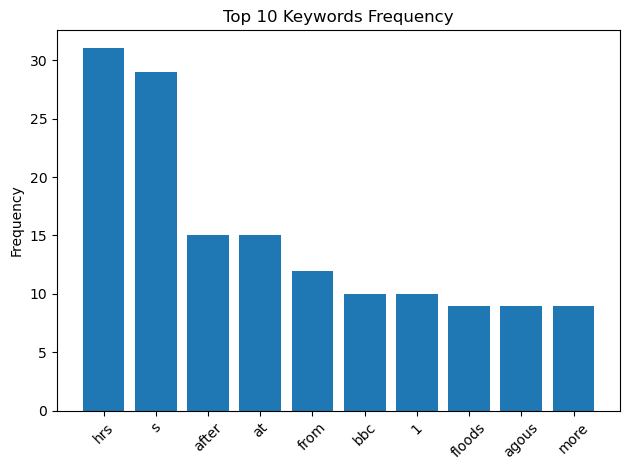

No articles found for https://edition.cnn.com/.
No articles found for https://www.theguardian.com/international.


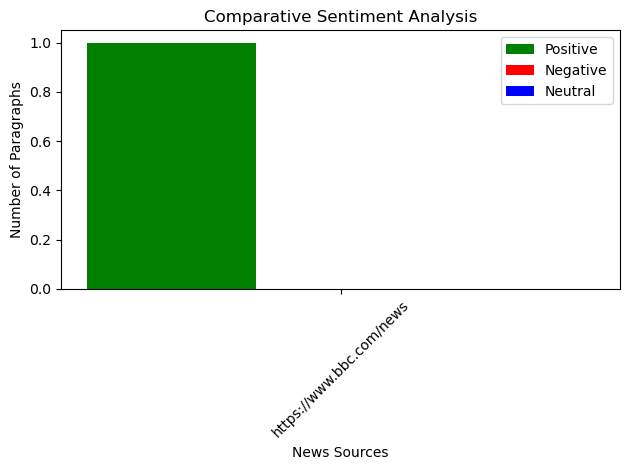

In [12]:
# import requests
# from bs4 import BeautifulSoup
# import re
# from collections import Counter
# import matplotlib.pyplot as plt
# from textblob import TextBlob

# # Step 1: WebScraper Class
# class WebScraper:
#     def __init__(self, url):
#         self.url = url

#     def download_html(self):
#         response = requests.get(self.url)
#         if response.status_code == 200:
#             return response.text
#         else:
#             print("Failed to retrieve the webpage.")
#             return None

#     def extract_articles(self, html):
#         soup = BeautifulSoup(html, 'html.parser')
#         articles = soup.find_all('article')  # Adjust based on actual structure
#         return [article.get_text() for article in articles]

# # Step 2: TextProcessor Class
# class TextProcessor:
#     @staticmethod
#     def clean_text(paragraphs):
#         cleaned_paragraphs = []
#         for paragraph in paragraphs:
#             cleaned_paragraph = re.sub(r'\s+', ' ', paragraph).strip()
#             cleaned_paragraphs.append(cleaned_paragraph.lower())
#         return cleaned_paragraphs

# # Step 3: SentimentAnalyzer Class
# class SentimentAnalyzer:
#     def __init__(self):
#         self.sentiment_counts = {"positive": 0, "negative": 0, "neutral": 0}

#     def analyze_sentiment(self, paragraphs):
#         for paragraph in paragraphs:
#             blob = TextBlob(paragraph)
#             polarity = blob.sentiment.polarity
#             if polarity > 0:
#                 self.sentiment_counts["positive"] += 1
#             elif polarity < 0:
#                 self.sentiment_counts["negative"] += 1
#             else:
#                 self.sentiment_counts["neutral"] += 1

# # Step 4: Visualization
# class Visualizer:
#     @staticmethod
#     def plot_sentiment(sentiment_counts):
#         labels = list(sentiment_counts.keys())
#         sizes = list(sentiment_counts.values())
#         plt.bar(labels, sizes, color=['green', 'red', 'blue'])
#         plt.title('Sentiment Analysis Results')
#         plt.ylabel('Number of Paragraphs')
#         plt.show()

#     @staticmethod
#     def plot_keyword_frequency(keyword_counts):
#         words, counts = zip(*keyword_counts)
#         plt.bar(words, counts)
#         plt.title('Top 10 Keywords Frequency')
#         plt.ylabel('Frequency')
#         plt.xticks(rotation=45)
#         plt.show()

# # Step 5: Main function to tie everything together
# def main(): 
#     url = "https://www.bbc.com/news/articles/ce3y0y15kpyo"
#     scraper = WebScraper(url)
#     html = scraper.download_html()

#     if html:
#         articles = scraper.extract_articles(html)
#         text_processor = TextProcessor()
#         cleaned_paragraphs = text_processor.clean_text(articles)

#         sentiment_analyzer = SentimentAnalyzer()
#         sentiment_analyzer.analyze_sentiment(cleaned_paragraphs)

#         print("Sentiment Counts:", sentiment_analyzer.sentiment_counts)

#         # Keyword frequency analysis
#         all_text = ' '.join(cleaned_paragraphs)
#         words = re.findall(r'\b\w+\b', all_text)
#         stopwords = set(["the", "and", "is", "in", "to", "of", "a", "that", "it", "for", "with", "as", "on", "this", "by", "an"])
#         filtered_words = [word for word in words if word not in stopwords]
#         word_counts = Counter(filtered_words)
#         most_common_words = word_counts.most_common(10)

#         print("Top 10 most frequent words:", most_common_words)

#         # Visualization
#         visualizer = Visualizer()
#         visualizer.plot_sentiment(sentiment_analyzer.sentiment_counts)
#         visualizer.plot_keyword_frequency(most_common_words)

# if __name__ == "__main__":
#     main()

import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
import matplotlib.pyplot as plt
from textblob import TextBlob

# Step 1: WebScraper Class
class WebScraper:
    def __init__(self, urls):
        self.urls = urls

    def download_html(self, url):
        print(f"Downloading HTML from {url}...")  # Debugging statement
        response = requests.get(url)
        if response.status_code == 200:
            return response.text
        else:
            print(f"Failed to retrieve the webpage: {url}")
            return None

    def extract_articles(self, html):
        soup = BeautifulSoup(html, 'html.parser')
        # Adjust the selector based on the actual structure of the page
        articles = soup.find_all('article') or soup.find_all('div', class_='css-1dbjc4n r-1g40b8q')  # Example change
        return [article.get_text() for article in articles if article.get_text()]

    def scrape_all(self):
        all_articles = {}
        for url in self.urls:
            html = self.download_html(url)
            if html:
                articles = self.extract_articles(html)
                all_articles[url] = articles
                print(f"Extracted {len(articles)} articles from {url}.")  # Debugging statement
        return all_articles

# Step 2: TextProcessor Class
class TextProcessor:
    @staticmethod
    def clean_text(paragraphs):
        cleaned_paragraphs = []
        for paragraph in paragraphs:
            cleaned_paragraph = re.sub(r'\s+', ' ', paragraph).strip()
            cleaned_paragraphs.append(cleaned_paragraph.lower())
        return cleaned_paragraphs

# Step 3: SentimentAnalyzer Class
class SentimentAnalyzer:
    def __init__(self):
        self.sentiment_counts = {"positive": 0, "negative": 0, "neutral": 0}

    def analyze_sentiment(self, paragraphs):
        for paragraph in paragraphs:
            blob = TextBlob(paragraph)
            polarity = blob.sentiment.polarity
            if polarity > 0:
                self.sentiment_counts["positive"] += 1
            elif polarity < 0:
                self.sentiment_counts["negative"] += 1
            else:
                self.sentiment_counts["neutral"] += 1

# Step 4: Visualization
class Visualizer:
    @staticmethod
    def plot_comparative_sentiment(sentiment_results):
        labels = list(sentiment_results.keys())
        positive = [sentiment['positive'] for sentiment in sentiment_results.values()]
        negative = [sentiment['negative'] for sentiment in sentiment_results.values()]
        neutral = [sentiment['neutral'] for sentiment in sentiment_results.values()]

        x = range(len(labels))
        
        plt.bar(x, positive, width=0.2, label='Positive', color='green', align='center')
        plt.bar([p + 0.2 for p in x], negative, width=0.2, label='Negative', color='red', align='center')
        plt.bar([p + 0.4 for p in x], neutral, width=0.2, label='Neutral', color='blue', align='center')
        
        plt.xlabel('News Sources')
        plt.ylabel('Number of Paragraphs')
        plt.title('Comparative Sentiment Analysis')
        plt.xticks([p + 0.2 for p in x], labels, rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_keyword_frequency(keyword_counts):
        if keyword_counts:  # Check if there are common words to plot
            words, counts = zip(*keyword_counts)
            plt.bar(words, counts)
            plt.title('Top 10 Keywords Frequency')
            plt.ylabel('Frequency')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print("No keywords to plot.")

# Step 5: Main function to tie everything together
def main():
    urls = [
        "https://www.bbc.com/news",
        "https://edition.cnn.com/",
        "https://www.theguardian.com/international"
    ]
    
    scraper = WebScraper(urls)
    all_articles = scraper.scrape_all()

    sentiment_results = {}
    text_processor = TextProcessor()

    for url, articles in all_articles.items():
        if not articles:
            print(f"No articles found for {url}.")
            continue

        cleaned_paragraphs = text_processor.clean_text(articles)

        sentiment_analyzer = SentimentAnalyzer()
        sentiment_analyzer.analyze_sentiment(cleaned_paragraphs)

        sentiment_results[url] = sentiment_analyzer.sentiment_counts
        print(f"Sentiment Counts for {url}:", sentiment_analyzer.sentiment_counts)

        # Keyword frequency analysis
        all_text = ' '.join(cleaned_paragraphs)
        words = re.findall(r'\b\w+\b', all_text)
        stopwords = set(["the", "and", "is", "in", "to", "of", "a", "that", "it", "for", "with", "as", "on", "this", "by", "an"])
        filtered_words = [word for word in words if word not in stopwords]
        word_counts = Counter(filtered_words)
        most_common_words = word_counts.most_common(10)

        if most_common_words:  # Check if there are common words to plot
            print(f"Top 10 most frequent words for {url}:", most_common_words)
            visualizer = Visualizer()
            visualizer.plot_keyword_frequency(most_common_words)
        else:
            print(f"No common words found for {url}.")

    # Comparative sentiment visualization
    visualizer.plot_comparative_sentiment(sentiment_results)

if __name__ == "__main__":
    main()

### Exercise 5